In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk")

df = pd.read_csv("/content/movies.csv")

print(df.head())

                                             name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nic

In [31]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB
None


In [32]:
print(df.describe())

              year        score         votes        budget         gross  \
count  7668.000000  7665.000000  7.665000e+03  5.497000e+03  7.479000e+03   
mean   2000.405451     6.390411  8.810850e+04  3.558988e+07  7.850054e+07   
std      11.153508     0.968842  1.633238e+05  4.145730e+07  1.657251e+08   
min    1980.000000     1.900000  7.000000e+00  3.000000e+03  3.090000e+02   
25%    1991.000000     5.800000  9.100000e+03  1.000000e+07  4.532056e+06   
50%    2000.000000     6.500000  3.300000e+04  2.050000e+07  2.020576e+07   
75%    2010.000000     7.100000  9.300000e+04  4.500000e+07  7.601669e+07   
max    2020.000000     9.300000  2.400000e+06  3.560000e+08  2.847246e+09   

           runtime  
count  7664.000000  
mean    107.261613  
std      18.581247  
min      55.000000  
25%      95.000000  
50%     104.000000  
75%     116.000000  
max     366.000000  


##Scatter Plots of Numeric Variables

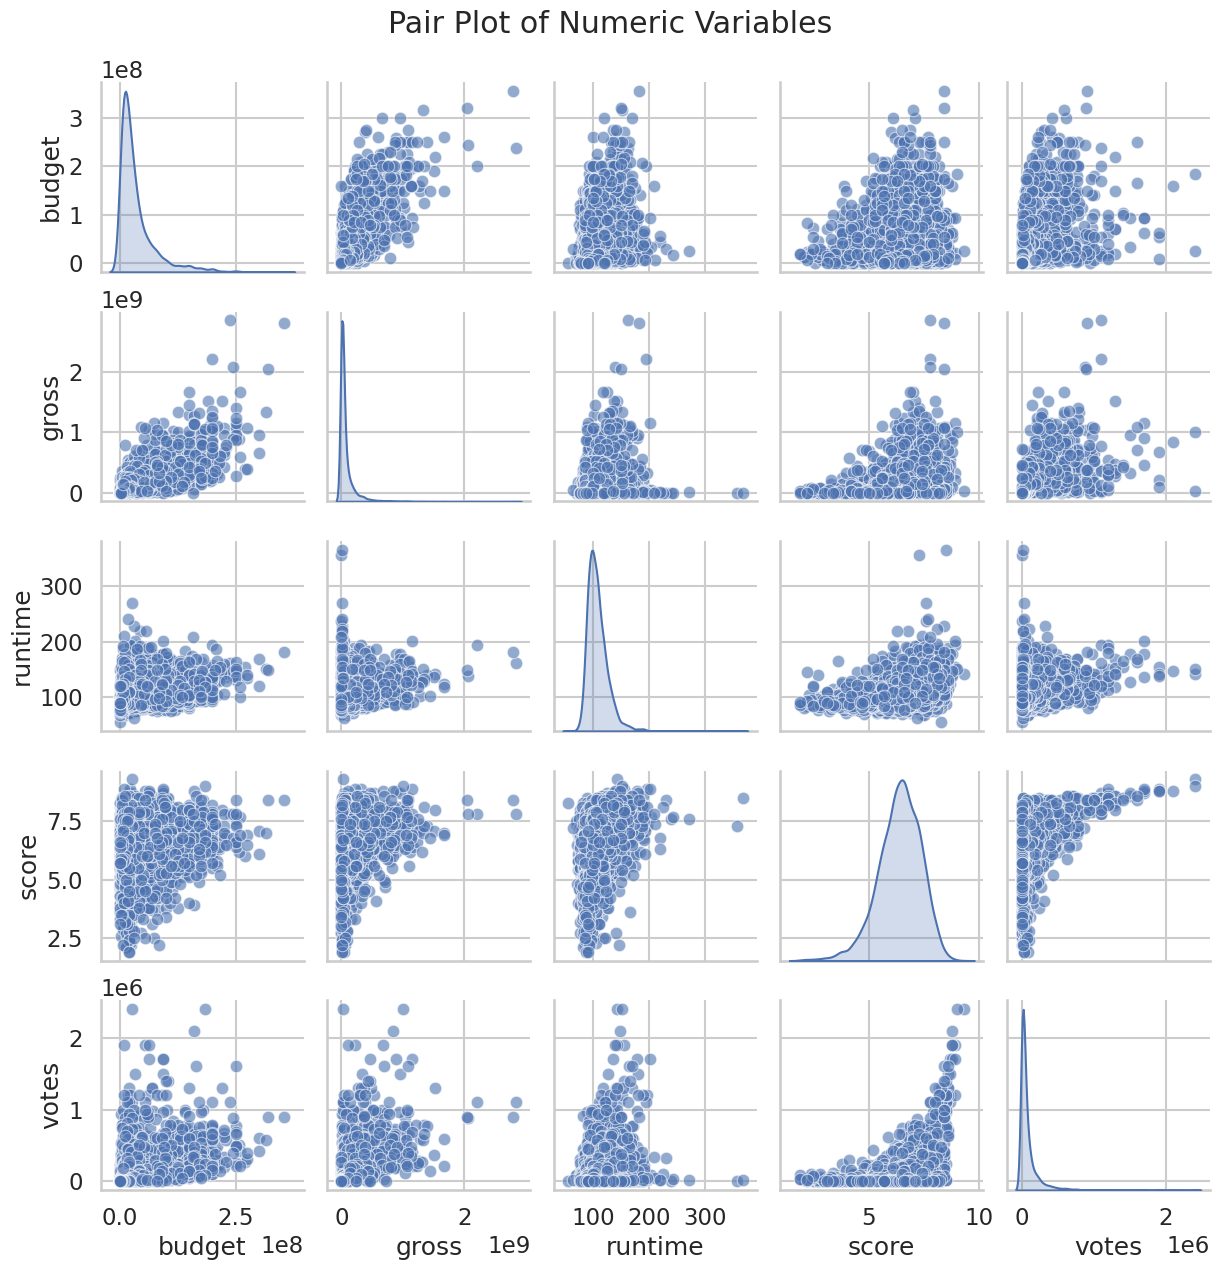

In [33]:
numeric_vars = ["budget", "gross", "runtime", "score", "votes"]

sns.pairplot(df[numeric_vars], diag_kind="kde", plot_kws={'alpha':0.6})
plt.suptitle("Pair Plot of Numeric Variables", y=1.02)
plt.show()


## Correlation Matrix

In [34]:
corr_matrix = df[numeric_vars].corr()
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
           budget     gross   runtime     score     votes
budget   1.000000  0.740395  0.320447  0.076254  0.442429
gross    0.740395  1.000000  0.245216  0.186258  0.630757
runtime  0.320447  0.245216  1.000000  0.399451  0.309212
score    0.076254  0.186258  0.399451  1.000000  0.409182
votes    0.442429  0.630757  0.309212  0.409182  1.000000


## Heatmap

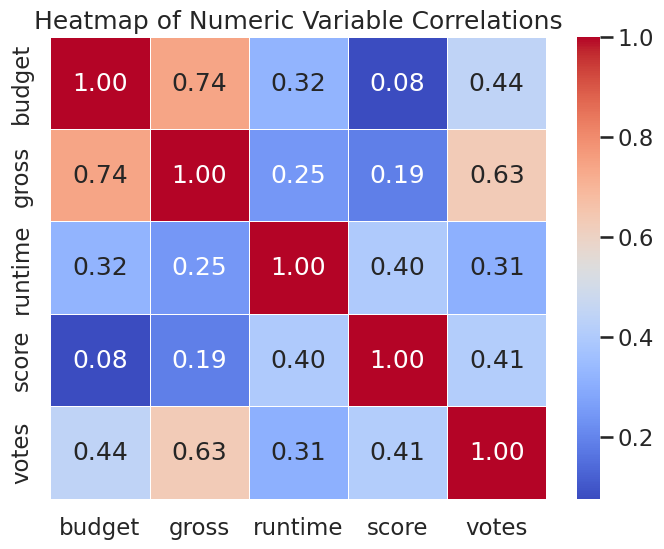

In [35]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Numeric Variable Correlations")
plt.show()

## Relationship Between Genre and Runtime (using Boxplot)

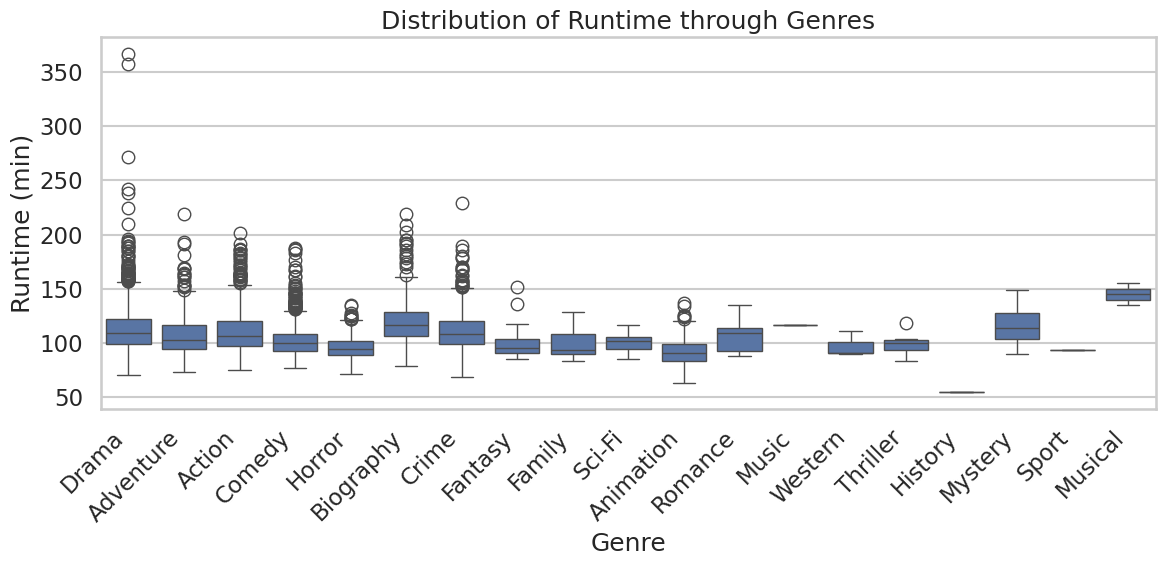

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="genre", y="runtime", data=df)
plt.title("Distribution of Runtime through Genres")
plt.xlabel("Genre")
plt.ylabel("Runtime (min)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### comment

some genres tend to have longer runtimes than others as a example Drama has longer runtime compare to Animation / comedy



## Relationship Between Budget and Runtime

### scatter plot

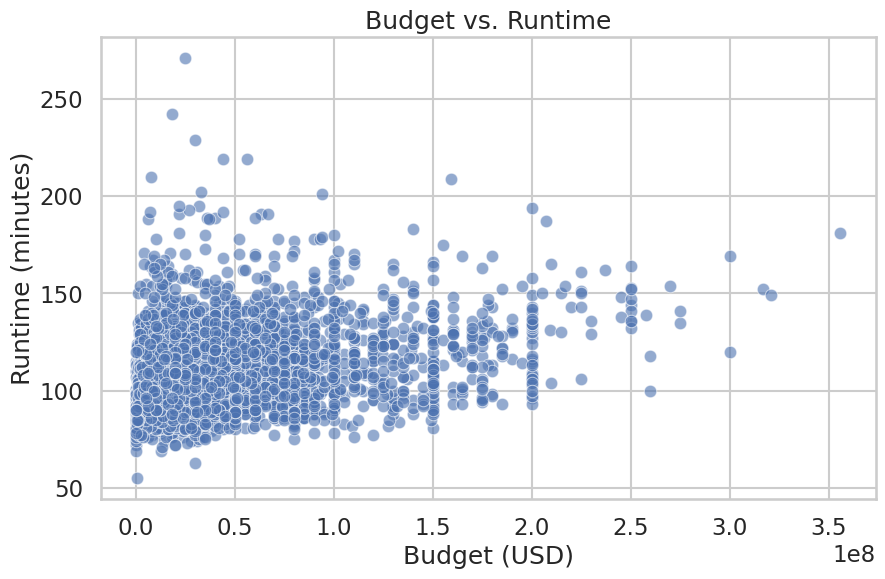

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="budget", y="runtime", data=df, alpha=0.6)
plt.title("Budget vs. Runtime")
plt.xlabel("Budget (USD)")
plt.ylabel("Runtime (minutes)")
plt.show()


### Correlation

In [38]:
budget_runtime_corr = df["budget"].corr(df["runtime"])
print(f"Pearson Correlation  Budget vs Runtime: {budget_runtime_corr:.2f}")


Pearson Correlation  Budget vs Runtime: 0.32


### Comment



*   Scatter plot visualize generally higher-budget films have longer runtimes
*   As the correlation is close to 0 it confirms a little linear relationship



## Relationship Between Genre and Country

### Cross-Tabulation

In [39]:

genre_country_ct = pd.crosstab(df["genre"], df["country"])
print("Cross-tabulation  Genre vs Country:")
print(genre_country_ct)


Cross-tabulation  Genre vs Country:
country    Argentina  Aruba  Australia  Austria  Belgium  Brazil  Canada  \
genre                                                                      
Action             0      1         19        1        1       1      30   
Adventure          1      0         10        0        0       0      10   
Animation          0      0          2        0        0       0       8   
Biography          0      0          7        0        1       0       8   
Comedy             2      0         20        0        1       0      39   
Crime              1      0          5        1        0       1      13   
Drama              4      0         23        2        4       4      51   
Family             0      0          0        0        0       0       1   
Fantasy            0      0          1        0        0       0       5   
History            0      0          0        0        0       0       1   
Horror             0      0          5        1     

### Heatmap of the Cross-Tab

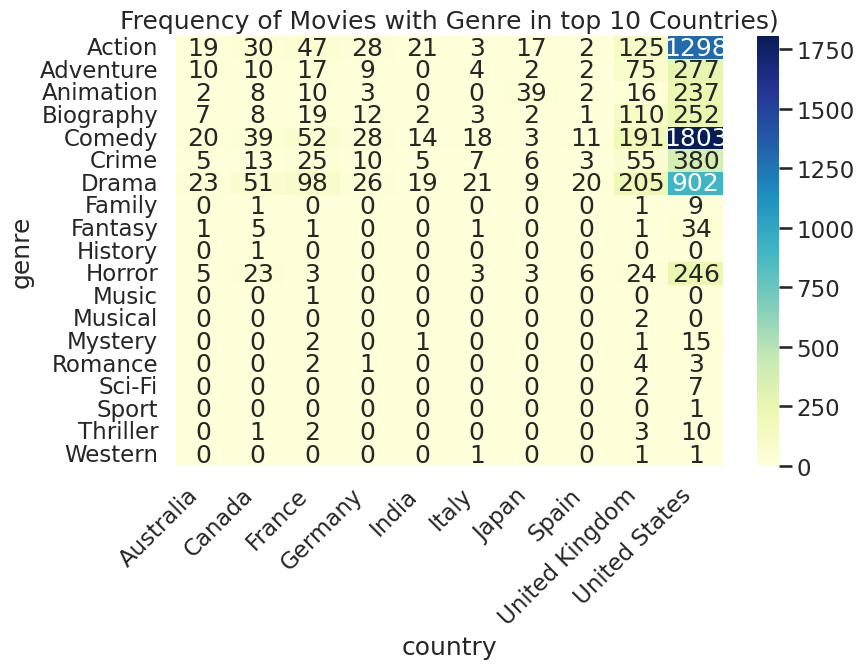

In [40]:
top_countries = df["country"].value_counts().nlargest(10).index
df_top = df[df["country"].isin(top_countries)]

genre_country_ct_top = pd.crosstab(df_top["genre"], df_top["country"])

plt.figure(figsize=(10, 8))
sns.heatmap(genre_country_ct_top, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Frequency of Movies with Genre in top 10 Countries)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout(pad=3.0)
plt.show()


### comment

This reveals genre like action,adventure,animation,biography,comedy,crime are distributed all over the world. but when taking genre like horro it is dominate in certain coutries may be due to cultural or industrial factors.